<a href="https://colab.research.google.com/github/mayrapick/proyecto_previaje/blob/main/proyecto_previaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1WWvf6yn5oS1xarapKnwr3s8l2wKWtd7d

import csv

Downloading...
From: https://drive.google.com/uc?id=1WWvf6yn5oS1xarapKnwr3s8l2wKWtd7d
To: /content/coordenadas_provincias.csv
100% 707/707 [00:00<00:00, 3.20MB/s]


In [ ]:
def openFile(file):
  """
  Lee datos del archivo de entrada y retorna
  una lista con la información que se va a usar en el trabajo.
  """
  lista = []
  with open(file, 'r') as datos:
    lectura = csv.reader(datos)
    for fila in lectura:
      lista.append(fila)
    lista.pop(0)

    return lista

lista_provincias_coordenadas = openFile('coordenadas_provincias.csv')
print(lista_provincias_coordenadas)

In [ ]:
def listToDict(lista):
  """
  Toma el resultado de la lectura de datos como argumento y devuelve una lista
  de diccionarios.
  Tiene un argumento 'encabezado' por defecto.
  La clave es el valor en el índice 0, y los valores asociados son una tupla
  con el resto de los elementos de la lista.
  """
  diccionario_provincias = {}
  for key, value1, value2 in lista_provincias_coordenadas:
    diccionario_provincias[key] = (value1, value2)

  return diccionario_provincias

print(listToDict(lista_provincias_coordenadas))

In [ ]:
class Provincia:
  """
  Esta clase representa una provincia.
  Atributos:
  nombre: str
  coordenada: tuple
  """
  def __init__(self, nombre, coordenadas):
    self.nombre = nombre
    self.coordenadas = coordenadas

  def __str__(self):
    return f"La provincia es: {self.nombre}, coordenadas: {self.coordenadas}"

#ejemplos:
diccionario_provincias = listToDict(lista_provincias_coordenadas)
for nombre, coordenadas in diccionario_provincias.items():
  provincia = Provincia(nombre, coordenadas) # crea el objeto como instancia de la clase
  print(provincia)


In [ ]:
#https://drive.google.com/file/d/1KWnSldEp76LoqMqNGyjLJYhEUlx1jIDJ/view?usp=sharing
!gdown 1KWnSldEp76LoqMqNGyjLJYhEUlx1jIDJ

import csv

In [ ]:
lista_viajes = openFile('Copia de viajes_origen_destino_mes.csv')
encabezado = ["fecha_inicio", "provincia_origen", "provincia_destino", "viajes", "viajeros", "edicion"]

# impresion de la lista
print(lista_viajes)

In [ ]:
class Viaje:
    """
    Esta clase representa un viaje,
    contiene los datos relevantes al análisis.
    """
    def __init__(self, mes_inicio, provincia_origen, provincia_destino, viajes, viajeros, edicion):

      self.mes_inicio = mes_inicio
      self.provincia_origen = provincia_origen
      self.provincia_destino = provincia_destino
      self.viajes = viajes
      self.viajeros = viajeros
      self.edicion = edicion

    def __str__(self):
      return f"Viaje: mes: {self.mes_inicio}, origen: {self.provincia_origen}, destino: {self.provincia_destino}, viajes: {self.viajes}, cantidad de viajeros: {self.viajeros}, edición: {self.edicion}"

# ejemplos:
# se crean mediante iteración todos los objetos posibles contenidos en lista_viajes
for item in lista_viajes:
  viaje = Viaje(item[0], item[1], item[2], int(item[3]), int(item[4]), item[5]) # crea el objeto como instancia de la clase
  print(viaje)


In [ ]:
def diccionarioViajes(lista):
  """
  Esta funcion retorna una lista de diccionarios de viajes en función de una lista
  que se le pasa por parámetro
  """
  dicc_viajes = []
  for item in lista:
    diccionario = {
      "mes_inicio": item[0],
      "provincia_origen": item[1],
      "provincia_destino": item[2],
      "viajes": int(item[3]),
      "viajeros": int(item[4]),
      "edicion": item[5]
    }
    dicc_viajes.append(diccionario)
  return dicc_viajes


viajes = diccionarioViajes(lista_viajes)
print(viajes)


In [ ]:
def datosRelevantes(lista, *encabezados):
  dicc_relevantes = []
  for item in lista:
    diccionario = {}
    for encabezado in encabezados:
      if encabezado in ["mes_inicio", "provincia_origen", "provincia_destino", "viajes", "viajeros", "edicion"]:
        diccionario[encabezado] = item[[x.lower() for x in ["mes_inicio", "provincia_origen", "provincia_destino", "viajes", "viajeros", "edicion"]].index(encabezado)]
    if diccionario:
      dicc_relevantes.append(diccionario)
  return dicc_relevantes

#ejemplo de uso, se filtran en este caso por los encabezados: viajes y edicion
viajes_edicion = datosRelevantes(lista_viajes, "viajes", "edicion")
print(viajes_edicion)

In [ ]:
#calcule cual fue la provincia que más viajeros recibio, en un mes y año indicados como parámetros.
def masViajeros(lista, mes, periodo):
  mes_str = str(mes).zfill(2)  # Rellena el valor del mes con ceros a la izquierda si es menor a una decena
  viajeros_por_provincia = {}
  for item in lista:
    if item[0] == f'{periodo}-{mes_str}':
      provincia_destino = item[2]
      viajeros = int(item[4])
      if provincia_destino in viajeros_por_provincia:
        viajeros_por_provincia[provincia_destino] += viajeros
      else:
        viajeros_por_provincia[provincia_destino] = viajeros
  if viajeros_por_provincia:
    provincia_mas_viajeros = max(viajeros_por_provincia, key=viajeros_por_provincia.get)
    return provincia_mas_viajeros, viajeros_por_provincia[provincia_destino]
  else:
    return "No hay datos."

#ejemplo de uso, se imprime por iteración los resultados para todos los meses de 2022
for mes in range(1, 13):
  provincia = masViajeros(lista_viajes, mes, 2021)
  print(f"Provincia con más viajeros en {mes}/2021: {provincia}")

#ejemplo de uso, caso en que no hay datos para cierto mes (10-2023)
provincia = masViajeros(lista_viajes, 10, 2023)
print(f"Provincia con más viajeros en 10/2023: {provincia}")

In [ ]:
#calcule el promedio de viajeros por viaje en una provincia de origen especifica.
def calcularPromedio(lista, provincia_origen):
  total_viajes = 0
  total_viajeros = 0
  for item in lista:
    if item[1] == provincia_origen:
      viajes = int(item[3])
      viajeros = int(item[4])
      total_viajes += viajes
      total_viajeros += viajeros
  if total_viajes > 0:
    promedio = round(total_viajeros / total_viajes)
    return promedio
  else:
    return "No hay suficientes viajes"

# creamos una lista de provincias para aplicar el promedio
provincias = []
for elemento in lista_viajes:
  provincia_origen = elemento[1]
  # se agrega a la lista solo una vez cada provincia
  if provincia_origen not in provincias:
      provincias.append(provincia_origen)

# ejemplos iterando cada provincia
for provincia in provincias:
    promedio = calcularPromedio(lista_viajes, provincia)
    print(f"Promedio de viajeros por viaje en {provincia}: {promedio}")



In [ ]:
# filtramos los encabezados relevantes: viajes y edicion
viajes_edicion = datosRelevantes(lista_viajes, "viajes", "edicion")

def calcularViajesPorEdicion(lista_dicc):
  """
  función que recibe una lista de diccionarios por parámetro
  y develve la cantidad de viajes por edicion en un diccionario
  (key: edicion, value: total de viajes)
  """
  viajes_por_edicion = {}

  for viaje in lista_dicc:
    edicion = viaje['edicion']
    cantidad_viajes = int(viaje['viajes'])
    if edicion in viajes_por_edicion:
       viajes_por_edicion[edicion] += cantidad_viajes
    else:
       viajes_por_edicion[edicion] = cantidad_viajes
  return viajes_por_edicion

viajes_por_edicion = calcularViajesPorEdicion(viajes_edicion)
print(viajes_por_edicion)

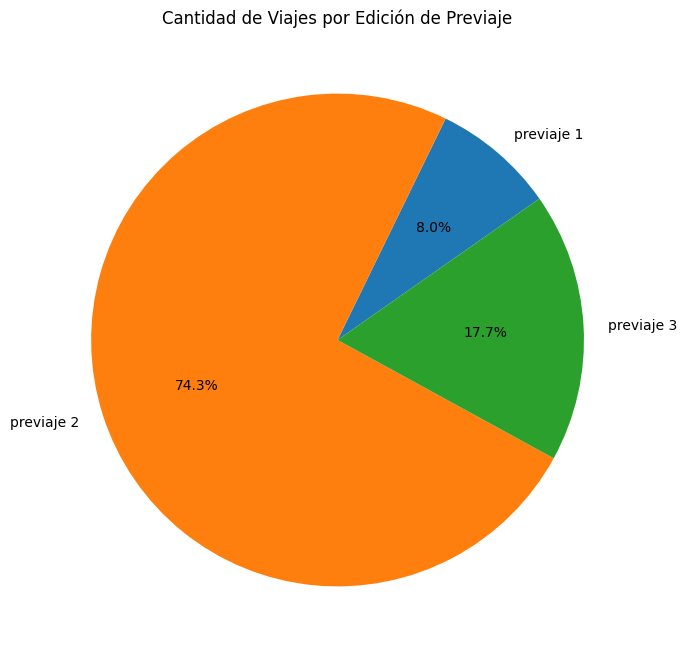

In [ ]:
import matplotlib.pyplot as plt

def crearGrafico(diccionario):
    lista_ediciones = list(diccionario.keys())
    lista_cantidades = list(diccionario.values())

    # Crear el gráfico
    plt.figure(figsize=(8, 8))
    plt.pie(lista_cantidades, labels=lista_ediciones, autopct="%0.1f%%", startangle=35)

    # Setear titulo
    plt.title("Cantidad de Viajes por Edición de Previaje")

    # Mostrar el gráfico
    plt.show()

crearGrafico(viajes_por_edicion)

In [ ]:
#consigna: obtener la  provincia que mas viajeros recibió para cada mes del año 2021. Mostrar en un grafico la cantidad de meses que cada provincia fue la
# mas visitada en un año:

import matplotlib.pyplot as plt
cantidad = []
provincias = []
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]
for mes in range(1, 13):
  provincia, viajeros = masViajeros(lista_viajes, mes, 2021)
  cantidad.append(viajeros)
  provincias.append(provincia)
  print(f'provincia: {provincia}, cantidad: {viajeros}')



fig, ax = plt.subplots()
ax.bar(meses, cantidad)

ax.set_ylabel("meses")
ax.set_title('provincias')
ax.legend(title='provincias con mas cantidad de viajes')
plt.xticks(rotation= 95, ticks=range(12), labels=provincias)
plt.show()




In [ ]:
print(provincias)
print(cantidad)

['Buenos Aires', 'Buenos Aires', 'Río Negro', 'Misiones', 'Misiones', 'Río Negro', 'Río Negro', 'Río Negro', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur', 'Córdoba', 'Río Negro', 'Buenos Aires']
[1026, 663, 511, 516, 176, 84, 2025, 2900, 2488, 895, 4452, 5184]


# Programa principal

In [ ]:
"""
Se recopila en este apartado cada una de las fórmulas aplicadas de forma tal que
permiten resolver los enunciados presentados en cada etapa.
las resoluciones se encuentran ejecutadas paso a paso anteriormente a lo largo
del desarrollo del programa.
NOTA: Se decidió unificar el criterio de nominación de funciones a camelCase
aún cuando algunos enunciados pedían funciones en snake_case.
"""


#ETAPA 1
print("-----------------------------------")
print("ETAPA 1")
#Leer el archivo 'coordenadas_provincias.csv'
lista_provincias_coordenadas = openFile('coordenadas_provincias.csv')

#Crear la función listToDict que se encarga de convertir los datos leídos a una lista de diccionarios.
#Llamar a la función anterior con los datos del archivo leído y verificar que devuelva lo pedido.
diccionario_provincias = listToDict(lista_provincias_coordenadas)
print("SE PASA DE LISTA A DICCIONARIO LAS PROVINCIAS Y SUS COORDENADAS")
print(diccionario_provincias)
print()

#Crear el constructor de la clase 'Provincia'
#Crear un objeto de la clase 'Provincia'
#Se imprimen todas las provincias de Argentina con sus coordenadas por iteración
print("CREANDO OBJETOS PROVINCIA")
for nombre, coordenadas in diccionario_provincias.items():
  provincia = Provincia(nombre, coordenadas) # crea el objeto como instancia de la clase
  print(provincia)
print()
#Se imprime una provincia inventada en función de una creación individual
mordor = Provincia('Mordor', (-35,150))
print("CREANDO UN OBJETO PROVINCIA INVENTADO")
print(mordor)
print()

#ETAPA 2
print("-----------------------------------")
print("ETAPA 2")
#Leer el archivo 'previaje.csv'
lista_viajes = openFile('Copia de viajes_origen_destino_mes.csv')

#Proponer una estructuras de datos para trabajar cada uno de los dataset.
viajes = diccionarioViajes(lista_viajes)
print("SE PASA DE LISTA A DICCIONARIO DE VIAJES")
print(viajes)
print()

#Crear el constructor de la clase 'Viaje'
#Crear un objeto de la clase 'Viaje'
viaje = Viaje(2022-12, 'Chubut', 'Santa Fe', 20, 20, 'Previaje 2') # crea el objeto como instancia de la clase
print("SE CREA UN OBJETO VIAJE")
print(viaje)
print()

#Crear una función 'datos_relevantes' que sólo devuelva (con la misma estructura de datos que se está trabajando) los datos de determinados encabezados pasados como parámetros.
viajes_edicion = datosRelevantes(lista_viajes, "viajes", "edicion")
print("SE FILTRAN LOS ENCABEZADOS VIAJES Y EDICION")
print(viajes_edicion)
print()

#Crear una función 'mas_viajeros' que calcule cual fue la provincia que más viajeros recibio, en un mes y año indicados como parámetros.
#ejemplo de uso, se imprime por iteración los resultados para todos los meses de 2022
print("SE OBTIENEN LAS PROVINCIAS CON MÁS VIAJEROS EN CADA MES DE 2022")
for mes in range(1, 13):
  provincia = masViajeros(lista_viajes, mes, 2022)
  print(f"Provincia con más viajeros en {mes}/2022: {provincia}")
print()

#ejemplo de uso, caso en que no hay datos para cierto mes (10-2023)
provincia = masViajeros(lista_viajes, 10, 2023)
print("SE VERIFICA LA RESPUESTA AL NO HABER DATOS")
print(f"Provincia con más viajeros en 10/2023: {provincia}")

#Crear una función 'calcular_promedio' que calcule el promedio de viajeros por viaje en una provincia de origen especifica.
# creamos una lista de provincias para aplicar el promedio
provincias = []
for elemento in lista_viajes:
  provincia_origen = elemento[1]
  # se agrega a la lista solo una vez cada provincia
  if provincia_origen not in provincias:
      provincias.append(provincia_origen)
print()

print("SE OBTIENEN LOS PROMEDIOS DE VIAJEROS POR VIAJE EN CADA PROVINCIA DE ARGENTINA")
# ejemplos iterando cada provincia
for provincia in provincias:
    promedio = calcularPromedio(lista_viajes, provincia)
    print(f"Promedio de viajeros por viaje en {provincia}: {promedio}")
print()

# ETAPA 3
print("-----------------------------------")
print("ETAPA 3")
# Usar los datos del archivo 'previaje.csv' para cargar una estructura de datos que consideren adecuada los datos que consideren pertinentes para responder la siguiente pregunta: ¿cuántos viajes fueron realizados en cada edición del programa PreViaje?
# filtramos los encabezados relevantes: viajes y edicion
viajes_edicion = datosRelevantes(lista_viajes, "viajes", "edicion")
viajes_por_edicion = calcularViajesPorEdicion(viajes_edicion)
print("SE CREA DICCIONARIO CON CLAVE EDICION Y VALOR VIAJES, CALCULANDO EL TOTAL DE VIAJES POR EDICION")
print(viajes_por_edicion)
print()

# Realizar un gráfico de torta que muestre los porcentajes de viajes correspondientes a cada edición, sobre el total de viajes del programa completo. Para ello deberán usar los módulos matplotlib y seaborn.
print("SE CREA UN GRÁFICO CON LOS PORCENTAJES DE VIAJES SOBRE EL TOTAL CORRESPONDIENTE A CADA EDICIÓN")
crearGrafico(viajes_por_edicion)